In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import re

In [2]:
from google.colab import files
files=files.upload()

Saving Fifa19Players.csv to Fifa19Players.csv


In [0]:

Fiifa19=pd.read_csv('Fifa19Players.csv')

In [0]:
np.set_printoptions(suppress=True)

In [6]:
Fiifa19

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,

In [7]:
Fiifa19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [0]:
del_labels=['Height','Weight']
Fiifa19.drop(labels=del_labels,axis=1,inplace=True)

In [8]:
Fiifa19.nunique()

Unnamed: 0        18207
ID                18207
Name              17194
Age                  29
Photo             18207
                  ...  
GKHandling           70
GKKicking            79
GKPositioning        79
GKReflexes           76
Release Clause     1244
Length: 89, dtype: int64

In [9]:
## All columns contains null values 

for j in Fiifa19.columns:
    print(j," ", sum(pd.isnull(Fiifa19[j])))



Unnamed: 0   0
ID   0
Name   0
Age   0
Photo   0
Nationality   0
Flag   0
Overall   0
Potential   0
Club   241
Club Logo   0
Value   0
Wage   0
Special   0
Preferred Foot   48
International Reputation   48
Weak Foot   48
Skill Moves   48
Work Rate   48
Body Type   48
Real Face   48
Position   60
Jersey Number   60
Joined   1553
Loaned From   16943
Contract Valid Until   289
Height   48
Weight   48
LS   2085
ST   2085
RS   2085
LW   2085
LF   2085
CF   2085
RF   2085
RW   2085
LAM   2085
CAM   2085
RAM   2085
LM   2085
LCM   2085
CM   2085
RCM   2085
RM   2085
LWB   2085
LDM   2085
CDM   2085
RDM   2085
RWB   2085
LB   2085
LCB   2085
CB   2085
RCB   2085
RB   2085
Crossing   48
Finishing   48
HeadingAccuracy   48
ShortPassing   48
Volleys   48
Dribbling   48
Curve   48
FKAccuracy   48
LongPassing   48
BallControl   48
Acceleration   48
SprintSpeed   48
Agility   48
Reactions   48
Balance   48
ShotPower   48
Jumping   48
Stamina   48
Strength   48
LongShots   48
Aggression   48
Intercep

In [0]:
cat_cols=['Age','Preferred Foot','International Reputation','Weak Foot','Skill Moves','Work Rate','Body Type','Real Face',
           'Position','Contract Valid Until','Jersey Number' ,'Club']

cont_cols=['Overall','Potential','Value','Special','Joined','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM',
            'LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','Finishing',
            'HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
            'Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength',
            'LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle',
             'SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes','Release Clause']

Not_interpolated=['Joined','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM',
'LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Release Clause' ]

In [11]:
## All unique values 
for I in Fiifa19.columns:
    print(I," ", (Fiifa19[I].nunique()))

Unnamed: 0   18207
ID   18207
Name   17194
Age   29
Photo   18207
Nationality   164
Flag   164
Overall   48
Potential   47
Club   651
Club Logo   679
Value   217
Wage   144
Special   1422
Preferred Foot   2
International Reputation   5
Weak Foot   5
Skill Moves   5
Work Rate   9
Body Type   10
Real Face   2
Position   27
Jersey Number   99
Joined   1736
Loaned From   341
Contract Valid Until   36
Height   21
Weight   57
LS   93
ST   93
RS   93
LW   105
LF   102
CF   102
RF   102
RW   105
LAM   101
CAM   101
RAM   101
LM   100
LCM   92
CM   92
RCM   92
RM   100
LWB   95
LDM   99
CDM   99
RDM   99
RWB   95
LB   98
LCB   108
CB   108
RCB   108
RB   98
Crossing   89
Finishing   93
HeadingAccuracy   91
ShortPassing   85
Volleys   87
Dribbling   94
Curve   89
FKAccuracy   90
LongPassing   84
BallControl   90
Acceleration   86
SprintSpeed   85
Agility   81
Reactions   68
Balance   81
ShotPower   92
Jumping   74
Stamina   85
Strength   74
LongShots   92
Aggression   85
Interceptions   89
Posit

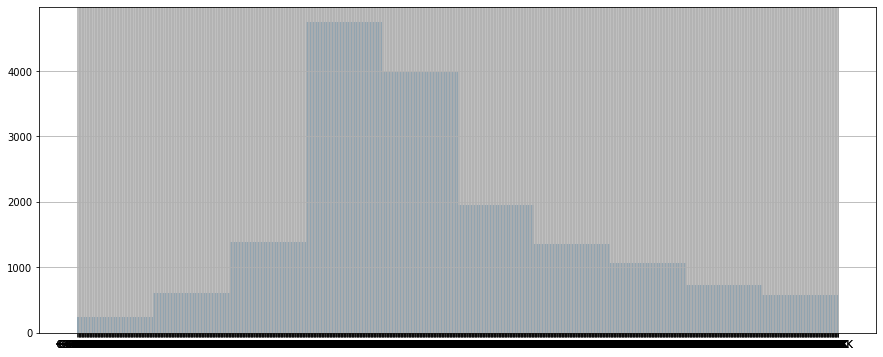

In [12]:
Fiifa19['Release Clause'].hist(figsize=(15,6))

In [13]:
## interpolatin the continuous variables 
for i in cont_cols:
    Fiifa19[i]=Fiifa19[i].interpolate(method='linear')
    print("Interpolated")
    print("/"*60)



Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
/////////////////////////

In [14]:
## interpolatin the categorical variable 
for j in cat_cols:
    Fiifa19[j]=Fiifa19[j].interpolate(method='bfill')
    print("Interpolated")
    print("/"*60)


Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////
Interpolated
////////////////////////////////////////////////////////////


In [0]:
## All columns contains null values 
Not_interpolated=['Joined','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM',
'LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Release Clause']

#Fiifa19['CAM'].unique


In [17]:
Fiifa19

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,

In [0]:

cat_cols=['Age','Preferred Foot','International Reputation','Weak Foot','Skill Moves','Work Rate','Body Type','Real Face',
           'Position','Contract Valid Until','Jersey Number' ,'Club']

cont_cols=['Overall','Potential','Value','Special','Joined','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM',
            'LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','Finishing',
            'HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
            'Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength',
            'LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle',
             'SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes','Release Clause']

Not_interpolated=['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM',
'LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Release Clause' ]

selected_cols=['Age','Preferred Foot','International Reputation','Weak Foot','Skill Moves','Work Rate','Body Type','Real Face',
'Position','Jersey Number' ,'Club','Overall','Potential','Special','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM',
'LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','Finishing',
'HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
'Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength',
'LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle',
'SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes','Release Clause','Value']

In [0]:
fifa19_New=pd.DataFrame(Fiifa19, columns= selected_cols)

#fifa19_New_pkl=pd.to_pickle(fifa19_New,'C:/Users/user/Desktop/IVY WORK BOOK/PYTHON/pickle files/fifa19_New.pkl')

In [0]:
cat_cols=['Age','Preferred Foot','International Reputation','Weak Foot','Skill Moves','Work Rate','Body Type','Real Face',
'Position','Contract Valid Until','Jersey Number' 'LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM',
'LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Club']

cont_cols=['Overall','Potential','Value','Special','Joined','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM',
            'LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','Finishing',
            'HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
            'Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength',
            'LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle',
             'SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes','Release Clause']

Not_interpolated=['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM',
'LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Release Clause' ]

selected_cols=['Age','Preferred Foot','International Reputation','Weak Foot','Skill Moves','Work Rate','Body Type','Real Face',
'Position','Jersey Number' ,'Club','Overall','Potential','Special','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM',
'LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','Finishing',
'HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
'Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength',
'LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle',
'SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes','Release Clause','Value']

In [22]:
fifa19_New[Not_interpolated].head(5)

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,€226.5M
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,€127.1M
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,€228.1M
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€138.6M
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,€196.4M


In [23]:
## replacing Nan Values

for j in Not_interpolated:
    Mode=fifa19_New[j].mode()[0]
    fifa19_New[j]=fifa19_New[j].fillna(Mode)    
    print("done")
    

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [24]:
fifa19_New.dropna()

,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Club,Overall,Potential,Special,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Value
0,31,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,FC Barcelona,94,94,2202,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,€110.5M
1,33,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,Juventus,94,94,2228,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,€77M
2,26,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,Paris Saint-Germain,92,93,2143,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,€118.5M
3,27,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,Manchester United,91,93,1471,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,€72M
4,27,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,Manchester City,91,92,2281,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,€102M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,Right,1.0,2.0,2.0,Medium/ Medium,Lean,No,CM,22.0,Crewe Alexandra,47,65,1307,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K,€60K
18203,19,Right,1.0,2.0,2.0,Medium/ Medium,Normal,No,ST,21.0,Trelleborgs FF,47,63,1098,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K,€60K
18204,16,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,ST,33.0,Cambridge United,47,67,1189,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,44+2,44+2,38+2,38+2,38+2,44+2,34+2,30+2,30+2,30+2,34+2,33+2,28+2,28+2,28+2,33+2,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45

In [25]:
fifa19_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 76 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Preferred Foot            18207 non-null  object 
 2   International Reputation  18207 non-null  float64
 3   Weak Foot                 18207 non-null  float64
 4   Skill Moves               18207 non-null  float64
 5   Work Rate                 18207 non-null  object 
 6   Body Type                 18207 non-null  object 
 7   Real Face                 18207 non-null  object 
 8   Position                  18207 non-null  object 
 9   Jersey Number             18207 non-null  float64
 10  Club                      18207 non-null  object 
 11  Overall                   18207 non-null  int64  
 12  Potential                 18207 non-null  int64  
 13  Special                   18207 non-null  int64  
 14  LS    

In [0]:
object_col=['Preferred Foot','Work Rate','Body Type','Real Face','Position','Club','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM',
'LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']

In [27]:
## All columns contains null values 

for j in fifa19_New.columns:
    print(j," ", sum(pd.isnull(fifa19_New[j])))

Age   0
Preferred Foot   0
International Reputation   0
Weak Foot   0
Skill Moves   0
Work Rate   0
Body Type   0
Real Face   0
Position   0
Jersey Number   0
Club   0
Overall   0
Potential   0
Special   0
LS   0
ST   0
RS   0
LW   0
LF   0
CF   0
RF   0
RW   0
LAM   0
CAM   0
RAM   0
LM   0
LCM   0
CM   0
RCM   0
RM   0
LWB   0
LDM   0
CDM   0
RDM   0
RWB   0
LB   0
LCB   0
CB   0
RCB   0
RB   0
Crossing   0
Finishing   0
HeadingAccuracy   0
ShortPassing   0
Volleys   0
Dribbling   0
Curve   0
FKAccuracy   0
LongPassing   0
BallControl   0
Acceleration   0
SprintSpeed   0
Agility   0
Reactions   0
Balance   0
ShotPower   0
Jumping   0
Stamina   0
Strength   0
LongShots   0
Aggression   0
Interceptions   0
Positioning   0
Vision   0
Penalties   0
Composure   0
Marking   0
StandingTackle   0
SlidingTackle   0
GKDiving   0
GKHandling   0
GKKicking   0
GKPositioning   0
GKReflexes   0
Release Clause   0
Value   0


In [28]:
## label encode performed on the categorical column
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

for j in object_col:
    fifa19_New[j]=le.fit_transform(fifa19_New[j])
    print("ok")



ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


In [29]:
fifa19_New[object_col].head(5)

,Preferred Foot,Work Rate,Body Type,Real Face,Position,Club,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,0,8,4,1,21,212,91,91,91,104,101,101,101,104,100,100,100,99,86,86,86,99,53,48,48,48,53,47,28,28,28,47
1,1,1,1,1,26,326,92,92,92,103,100,100,100,103,98,98,98,97,81,81,81,97,56,49,49,49,56,52,42,42,42,52
2,1,2,5,1,14,435,86,86,86,103,99,99,99,103,99,99,99,97,81,81,81,97,56,47,47,47,56,50,29,29,29,50
3,1,8,3,1,5,375,40,40,40,54,45,45,45,54,46,46,46,45,32,32,32,45,47,50,50,50,47,51,61,61,61,51
4,1,0,6,1,19,374,83,83,83,102,96,96,96,102,98,98,98,97,90,90,90,97,81,82,82,82,81,77,69,69,69,77


In [33]:
fifa19_New.head(5)

,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Club,Overall,Potential,Special,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Value,Release Clause_New
0,31,0,5.0,4.0,4.0,8,4,1,21,10.0,212,94,94,2202,91,91,91,104,101,101,101,104,100,100,100,99,86,86,86,99,53,48,48,48,53,47,28,28,28,47,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,€110.5M,226.5
1,33,1,5.0,4.0,5.0,1,1,1,26,7.0,326,94,94,2228,92,92,92,103,100,100,100,103,98,98,98,97,81,81,81,97,56,49,49,49,56,52,42,42,42,52,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,€77M,127.1
2,26,1,5.0,5.0,5.0,2,5,1,14,10.0,435,92,93,2143,86,86,86,103,99,99,99,103,99,99,99,97,81,81,81,97,56,47,47,47,56,50,29,29,29,50,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,€118.5M,228.1
3,27,1,4.0,3.0,1.0,8,3,1,5,1.0,375,91,93,1471,40,40,40,54,45,45,45,54,46,46,46,45,32,32,32,45,47,50,50,50,47,51,61,61,61,51,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,€72M,138.6
4,27,1,4.0,5.0,4.0,0,6,1,19,7.0,374,91,92,2281,83,83,83,102,96,96,96,102,98,98,98,97,90,90,90,97,81,82,82,82,81,77,69,69,69,77,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,€102M,196.4


In [0]:
##
from decimal import Decimal

def making_Relase_clause(inpnumber):
    Number=Decimal(re.sub(r'[^\d.]', '',inpnumber))
    return(Number)
   


In [0]:
fifa19_New['Value_New']=fifa19_New['Value'].apply(making_Relase_clause)

In [0]:
fifa19_New.drop(labels=['Release Clause','Value'],axis=1,inplace=True)

In [37]:
fifa19_New.head(4)

,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Club,Overall,Potential,Special,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause_New,Value_New
0,31,0,5.0,4.0,4.0,8,4,1,21,10.0,212,94,94,2202,91,91,91,104,101,101,101,104,100,100,100,99,86,86,86,99,53,48,48,48,53,47,28,28,28,47,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,110.5
1,33,1,5.0,4.0,5.0,1,1,1,26,7.0,326,94,94,2228,92,92,92,103,100,100,100,103,98,98,98,97,81,81,81,97,56,49,49,49,56,52,42,42,42,52,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,77
2,26,1,5.0,5.0,5.0,2,5,1,14,10.0,435,92,93,2143,86,86,86,103,99,99,99,103,99,99,99,97,81,81,81,97,56,47,47,47,56,50,29,29,29,50,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,118.5
3,27,1,4.0,3.0,1.0,8,3,1,5,1.0,375,91,93,1471,40,40,40,54,45,45,45,54,46,46,46,45,32,32,32,45,47,50,50,50,47,51,61,61,61,51,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,72


In [0]:
selected_cols=['Age', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Club', 'Overall', 'Potential', 'Special', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause_New', 'Value_New']

In [0]:
fifa19_New.columns

Index(['Age', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Club', 'Overall', 'Potential', 'Special', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause_New', 'Value_New'],
      dtype='object')

In [0]:
fifa19_New_Ml=pd.DataFrame(fifa19_New,columns=selected_cols)


#fifa19_New_Ml_pkl=pd.to_pickle(fifa19_New_Ml,'C:/Users/user/Desktop/IVY WORK BOOK/PYTHON/pickle files/fifa19_New_Ml.pkl')

In [41]:
fifa19_New_Ml

,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Club,Overall,Potential,Special,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause_New,Value_New
0,31,0,5.0,4.0,4.0,8,4,1,21,10.0,212,94,94,2202,91,91,91,104,101,101,101,104,100,100,100,99,86,86,86,99,53,48,48,48,53,47,28,28,28,47,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,110.5
1,33,1,5.0,4.0,5.0,1,1,1,26,7.0,326,94,94,2228,92,92,92,103,100,100,100,103,98,98,98,97,81,81,81,97,56,49,49,49,56,52,42,42,42,52,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,77
2,26,1,5.0,5.0,5.0,2,5,1,14,10.0,435,92,93,2143,86,86,86,103,99,99,99,103,99,99,99,97,81,81,81,97,56,47,47,47,56,50,29,29,29,50,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,118.5
3,27,1,4.0,3.0,1.0,8,3,1,5,1.0,375,91,93,1471,40,40,40,54,45,45,45,54,46,46,46,45,32,32,32,45,47,50,50,50,47,51,61,61,61,51,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,72
4,27,1,4.0,5.0,4.0,0,6,1,19,7.0,374,91,92,2281,83,83,83,102,96,96,96,102,98,98,98,97,90,90,90,97,81,82,82,82,81,77,69,69,69,77,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,1,1.0,2.0,2.0,8,3,0,4,22.0,165,47,65,1307,11,11,11,19,17,17,17,19,19,19,19,17,15,15,15,17,14,17,17,17,14,18,24,24,24,18,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143,60
18203,19,1,1.0,2.0,2.0,8,6,0,26,21.0,587,47,63,1098,14,14,14,13,14,14,14,13,13,13,13,11,5,5,5,11,0,3,3,3,0,0,6,6,6,0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113,60
18204,16,1,1.0,3.0,2.0,8,6,0,26,33.0,122,47,67,1189,14,14,14,21,19,19,19,21,18,18,18,17,8,8,8,17,4,2,2,2,4,4,2,2,2,4,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165,60
18205,17,1,1.0,3.0,2.0,8,3,0,24,34.0,586,47,66,1228,16,16,16,23,19,19,19,23,19,19,19,20,9,9,9,20,6,4,4,4,6,6,5,5,5,6,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143,60


In [0]:
## converting to minmax

from sklearn.preprocessing import MinMaxScaler

MinMax_scale=MinMaxScaler()

X=MinMax_scale.fit_transform(fifa19_New_Ml)


In [43]:
X.shape

(18207, 76)

In [44]:
## Analyzing the 
for i in range(4):
    print(np.min(X[i]))
    print(np.max(X[i]))
    print('*'*50)

0.0
1.0000000000000002
**************************************************
0.061224489795918366
1.0
**************************************************
0.08791208791208792
1.0000000000000002
**************************************************
0.0
1.0
**************************************************


In [0]:
# Finding the best number of clusters based on the inertia value
from sklearn.cluster import KMeans
inertiaValue = []
km = KMeans(n_clusters=7, 
                init='random', 
                n_init=5, 
                max_iter=100,
                tol=1e-02,
                random_state=0)


fifa19_New_Ml=MinMax_scale.inverse_transform(X)
print(fifa19_New_Ml)
predictcluster=km.fit_predict(fifa19_New_Ml)
print(predictcluster)
fifa19_New_Ml_cluster=pd.DataFrame(fifa19_New_Ml,columns=selected_cols)
fifa19_New_Ml_cluster['Predclusterid']=predictcluster
print(km.inertia_)


    



[[ 31.    0.    5.  ...   8.  226.5 110.5]
 [ 33.    1.    5.  ...  11.  127.1  77. ]
 [ 26.    1.    5.  ...  11.  228.1 118.5]
 ...
 [ 16.    1.    1.  ...  13.  165.   60. ]
 [ 17.    1.    1.  ...   9.  143.   60. ]
 [ 16.    1.    1.  ...   9.  165.   60. ]]
[0 6 6 ... 1 1 1]
1393221743.241045


In [0]:
fifa19_New_Ml_cluster.tail(5)

,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause_New,Value_New,Predclusterid
18202,19.0,1.0,1.0,2.0,2.0,8.0,3.0,0.0,4.0,22.0,...,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143.0,60.0,1
18203,19.0,1.0,1.0,2.0,2.0,8.0,6.0,0.0,26.0,21.0,...,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113.0,60.0,2
18204,16.0,1.0,1.0,3.0,2.0,8.0,6.0,0.0,26.0,33.0,...,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165.0,60.0,1
18205,17.0,1.0,1.0,3.0,2.0,8.0,3.0,0.0,24.0,34.0,...,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143.0,60.0,1
18206,16.0,1.0,1.0,3.0,2.0,8.0,3.0,0.0,4.0,33.0,...,43.0,50.0,10.0,15.0,9.0,12.0,9.0,165.0,60.0,1


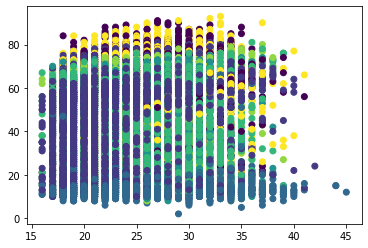

In [0]:
## Visulaisng the clusters 

plt.scatter(x=fifa19_New_Ml_cluster['Age'], y=fifa19_New_Ml_cluster['StandingTackle'], c=fifa19_New_Ml_cluster['Predclusterid'])

In [52]:
# Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage = 'ward')

predictcluster=hc.fit_predict(X)
print(predictcluster)
fifa19_New_Ml=MinMax_scale.inverse_transform(X)
fifa19_New_Ml_cluster=pd.DataFrame(fifa19_New_Ml,columns=selected_cols)
fifa19_New_Ml_cluster['PredclusteridHierachical']=predictcluster



[0 0 0 ... 4 4 2]


In [53]:
fifa19_New_Ml_cluster

,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Club,Overall,Potential,Special,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause_New,Value_New,PredclusteridHierachical
0,31.0,0.0,5.0,4.0,4.0,8.0,4.0,1.0,21.0,10.0,212.0,94.0,94.0,2202.0,91.0,91.0,91.0,104.0,101.0,101.0,101.0,104.0,100.0,100.0,100.0,99.0,86.0,86.0,86.0,99.0,53.0,48.0,48.0,48.0,53.0,47.0,28.0,28.0,28.0,47.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,110.5,0
1,33.0,1.0,5.0,4.0,5.0,1.0,1.0,1.0,26.0,7.0,326.0,94.0,94.0,2228.0,92.0,92.0,92.0,103.0,100.0,100.0,100.0,103.0,98.0,98.0,98.0,97.0,81.0,81.0,81.0,97.0,56.0,49.0,49.0,49.0,56.0,52.0,42.0,42.0,42.0,52.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,77.0,0
2,26.0,1.0,5.0,5.0,5.0,2.0,5.0,1.0,14.0,10.0,435.0,92.0,93.0,2143.0,86.0,86.0,86.0,103.0,99.0,99.0,99.0,103.0,99.0,99.0,99.0,97.0,81.0,81.0,81.0,97.0,56.0,47.0,47.0,47.0,56.0,50.0,29.0,29.0,29.0,50.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,118.5,0
3,27.0,1.0,4.0,3.0,1.0,8.0,3.0,1.0,5.0,1.0,375.0,91.0,93.0,1471.0,40.0,40.0,40.0,54.0,45.0,45.0,45.0,54.0,46.0,46.0,46.0,45.0,32.0,32.0,32.0,45.0,47.0,50.0,50.0,50.0,47.0,51.0,61.0,61.0,61.0,51.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,72.0,3
4,27.0,1.0,4.0,5.0,4.0,0.0,6.0,1.0,19.0,7.0,374.0,91.0,92.0,2281.0,83.0,83.0,83.0,102.0,96.0,96.0,96.0,102.0,98.0,98.0,98.0,97.0,90.0,90.0,90.0,97.0,81.0,82.0,82.0,82.0,81.0,77.0,69.0,69.0,69.0,77.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,102.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19.0,1.0,1.0,2.0,2.0,8.0,3.0,0.0,4.0,22.0,165.0,47.0,65.0,1307.0,11.0,11.0,11.0,19.0,17.0,17.0,17.0,19.0,19.0,19.0,19.0,17.0,15.0,15.0,15.0,17.0,14.0,17.0,17.0,17.0,14.0,18.0,24.0,24.0,24.0,18.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143.0,60.0,2
18203,19.0,1.0,1.0,2.0,2.0,8.0,6.0,0.0,26.0,21.0,587.0,47.0,63.0,1098.0,14.0,14.0,14.0,13.0,14.0,14.0,14.0,13.0,13.0,13.0,13.0,11.0,5.0,5.0,5.0,11.0,0.0,3.0,3.0,3.0,0.0,0.0,6.0,6.0,6.0,0.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113.0,60.0,4
18204,16.0,1.0,1.0,3.0,2.0,8.0,6.0,0.0,26.0,33.0,122.0,47.0,67.0,1189.0,14.0,14.0,14.0,21.0,19.0,19.0,19.0,21.0,18.0,18.0,18.0,17.0,8.0,8.0,8.0,17.0,4.0,2.0,2.0,2.0,4.0,4.0,2.0,2.0,2.0,4.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165.0,60.0,4


In [45]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1, min_samples=5)
predictcluster=db.fit_predict(X)
print(predictcluster)
fifa19_New_Ml=MinMax_scale.inverse_transform(X)
fifa19_New_Ml_cluster=pd.DataFrame(fifa19_New_Ml,columns=selected_cols)
fifa19_New_Ml_cluster['Predclusterid']=predictcluster
fifa19_New_Ml_cluster




[-1  1  1 ...  4  4  4]


In [46]:
fifa19_New_Ml_cluster

,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Club,Overall,Potential,Special,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause_New,Value_New,Predclusterid
0,31.0,0.0,5.0,4.0,4.0,8.0,4.0,1.0,21.0,10.0,212.0,94.0,94.0,2202.0,91.0,91.0,91.0,104.0,101.0,101.0,101.0,104.0,100.0,100.0,100.0,99.0,86.0,86.0,86.0,99.0,53.0,48.0,48.0,48.0,53.0,47.0,28.0,28.0,28.0,47.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,110.5,-1
1,33.0,1.0,5.0,4.0,5.0,1.0,1.0,1.0,26.0,7.0,326.0,94.0,94.0,2228.0,92.0,92.0,92.0,103.0,100.0,100.0,100.0,103.0,98.0,98.0,98.0,97.0,81.0,81.0,81.0,97.0,56.0,49.0,49.0,49.0,56.0,52.0,42.0,42.0,42.0,52.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,77.0,1
2,26.0,1.0,5.0,5.0,5.0,2.0,5.0,1.0,14.0,10.0,435.0,92.0,93.0,2143.0,86.0,86.0,86.0,103.0,99.0,99.0,99.0,103.0,99.0,99.0,99.0,97.0,81.0,81.0,81.0,97.0,56.0,47.0,47.0,47.0,56.0,50.0,29.0,29.0,29.0,50.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,118.5,1
3,27.0,1.0,4.0,3.0,1.0,8.0,3.0,1.0,5.0,1.0,375.0,91.0,93.0,1471.0,40.0,40.0,40.0,54.0,45.0,45.0,45.0,54.0,46.0,46.0,46.0,45.0,32.0,32.0,32.0,45.0,47.0,50.0,50.0,50.0,47.0,51.0,61.0,61.0,61.0,51.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,72.0,0
4,27.0,1.0,4.0,5.0,4.0,0.0,6.0,1.0,19.0,7.0,374.0,91.0,92.0,2281.0,83.0,83.0,83.0,102.0,96.0,96.0,96.0,102.0,98.0,98.0,98.0,97.0,90.0,90.0,90.0,97.0,81.0,82.0,82.0,82.0,81.0,77.0,69.0,69.0,69.0,77.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,102.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19.0,1.0,1.0,2.0,2.0,8.0,3.0,0.0,4.0,22.0,165.0,47.0,65.0,1307.0,11.0,11.0,11.0,19.0,17.0,17.0,17.0,19.0,19.0,19.0,19.0,17.0,15.0,15.0,15.0,17.0,14.0,17.0,17.0,17.0,14.0,18.0,24.0,24.0,24.0,18.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143.0,60.0,4
18203,19.0,1.0,1.0,2.0,2.0,8.0,6.0,0.0,26.0,21.0,587.0,47.0,63.0,1098.0,14.0,14.0,14.0,13.0,14.0,14.0,14.0,13.0,13.0,13.0,13.0,11.0,5.0,5.0,5.0,11.0,0.0,3.0,3.0,3.0,0.0,0.0,6.0,6.0,6.0,0.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113.0,60.0,4
18204,16.0,1.0,1.0,3.0,2.0,8.0,6.0,0.0,26.0,33.0,122.0,47.0,67.0,1189.0,14.0,14.0,14.0,21.0,19.0,19.0,19.0,21.0,18.0,18.0,18.0,17.0,8.0,8.0,8.0,17.0,4.0,2.0,2.0,2.0,4.0,4.0,2.0,2.0,2.0,4.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165.0,60.0,4
18205,17.0

In [51]:
# Spectral Clustering
from sklearn.cluster import SpectralClustering

sc=SpectralClustering( n_init=10,gamma=0.01)
predictcluster=sc.fit_predict(X)
print(predictcluster)
fifa19_New_Ml=MinMax_scale.inverse_transform(X)
fifa19_New_Ml_cluster=pd.DataFrame(fifa19_New_Ml,columns=selected_cols)
fifa19_New_Ml_cluster['PredclusteridSpectral']=predictcluster


[7 7 7 ... 0 0 6]


In [50]:
fifa19_New_Ml_cluster['PredclusteridSpectral'].values

array([0, 0, 0, ..., 6, 6, 1], dtype=int32)

In [48]:
fifa19_New_Ml_cluster

,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Club,Overall,Potential,Special,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause_New,Value_New,PredclusteridSpectral
0,31.0,0.0,5.0,4.0,4.0,8.0,4.0,1.0,21.0,10.0,212.0,94.0,94.0,2202.0,91.0,91.0,91.0,104.0,101.0,101.0,101.0,104.0,100.0,100.0,100.0,99.0,86.0,86.0,86.0,99.0,53.0,48.0,48.0,48.0,53.0,47.0,28.0,28.0,28.0,47.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,110.5,0
1,33.0,1.0,5.0,4.0,5.0,1.0,1.0,1.0,26.0,7.0,326.0,94.0,94.0,2228.0,92.0,92.0,92.0,103.0,100.0,100.0,100.0,103.0,98.0,98.0,98.0,97.0,81.0,81.0,81.0,97.0,56.0,49.0,49.0,49.0,56.0,52.0,42.0,42.0,42.0,52.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,77.0,0
2,26.0,1.0,5.0,5.0,5.0,2.0,5.0,1.0,14.0,10.0,435.0,92.0,93.0,2143.0,86.0,86.0,86.0,103.0,99.0,99.0,99.0,103.0,99.0,99.0,99.0,97.0,81.0,81.0,81.0,97.0,56.0,47.0,47.0,47.0,56.0,50.0,29.0,29.0,29.0,50.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,118.5,0
3,27.0,1.0,4.0,3.0,1.0,8.0,3.0,1.0,5.0,1.0,375.0,91.0,93.0,1471.0,40.0,40.0,40.0,54.0,45.0,45.0,45.0,54.0,46.0,46.0,46.0,45.0,32.0,32.0,32.0,45.0,47.0,50.0,50.0,50.0,47.0,51.0,61.0,61.0,61.0,51.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,72.0,3
4,27.0,1.0,4.0,5.0,4.0,0.0,6.0,1.0,19.0,7.0,374.0,91.0,92.0,2281.0,83.0,83.0,83.0,102.0,96.0,96.0,96.0,102.0,98.0,98.0,98.0,97.0,90.0,90.0,90.0,97.0,81.0,82.0,82.0,82.0,81.0,77.0,69.0,69.0,69.0,77.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,102.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19.0,1.0,1.0,2.0,2.0,8.0,3.0,0.0,4.0,22.0,165.0,47.0,65.0,1307.0,11.0,11.0,11.0,19.0,17.0,17.0,17.0,19.0,19.0,19.0,19.0,17.0,15.0,15.0,15.0,17.0,14.0,17.0,17.0,17.0,14.0,18.0,24.0,24.0,24.0,18.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143.0,60.0,6
18203,19.0,1.0,1.0,2.0,2.0,8.0,6.0,0.0,26.0,21.0,587.0,47.0,63.0,1098.0,14.0,14.0,14.0,13.0,14.0,14.0,14.0,13.0,13.0,13.0,13.0,11.0,5.0,5.0,5.0,11.0,0.0,3.0,3.0,3.0,0.0,0.0,6.0,6.0,6.0,0.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113.0,60.0,6
18204,16.0,1.0,1.0,3.0,2.0,8.0,6.0,0.0,26.0,33.0,122.0,47.0,67.0,1189.0,14.0,14.0,14.0,21.0,19.0,19.0,19.0,21.0,18.0,18.0,18.0,17.0,8.0,8.0,8.0,17.0,4.0,2.0,2.0,2.0,4.0,4.0,2.0,2.0,2.0,4.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165.0,60.0,6
182